# Movie Genre Classification

## Importing libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import csv
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from wordcloud import WordCloud
from nltk.corpus import stopwords

## Reading and Describing

##### In this we are converting the text data file into csv file and giving a name to it

In [1]:
# For Train Data

In [3]:
with open('train_data.txt', 'r', encoding='utf-8') as text_file:
    lines = text_file.readlines()

In [4]:
csv_file_name = 'train_data.csv'
with open(csv_file_name, 'w', newline='', encoding= 'utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    for line in lines:
        data = line.strip().split(',') 
        csv_writer.writerow(data)

In [5]:
train_data = pd.read_csv('train_data.csv',engine="python",
                       sep=" ::: ",
                       names=["id", "movie", "genre", "summary"])

In [6]:
train_data.head()

,id,movie,genre,summary
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [3]:
# For Test data

In [7]:
with open('test_data.txt', 'r', encoding='utf-8') as text_file:
    lines = text_file.readlines()

In [8]:
import csv
csv_file_name = 'test_data.csv'
with open(csv_file_name, 'w', newline='', encoding= 'utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    for line in lines:
        data = line.strip().split(',') 
        csv_writer.writerow(data)

In [9]:
test_data = pd.read_csv('test_data.csv',engine="python",
                       sep=" ::: ",
                       names=["id", "movie", "summary"])

In [10]:
test_data.head()

,id,movie,summary
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [11]:
train_data.describe()

,id,movie,genre,summary
count,54214,54214,54214,54214
unique,54214,54214,27,54092
top,1,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy o...
freq,1,1,13613,12


In [12]:
test_data.describe()

,id,movie,summary
count,54200,54200,54200
unique,54200,54200,54082
top,1,Edgar's Lunch (1998),Grammy - music award of the American academy o...
freq,1,1,10


##### Checking if the Null values are present in the data set.

In [13]:
train_data.isnull().sum()

id         0
movie      0
genre      0
summary    0
dtype: int64

In [14]:
test_data.isnull().sum()

id         0
movie      0
summary    0
dtype: int64

In [15]:
train_data.duplicated().sum()

0

In [16]:
train_data.shape

(54214, 4)

In [17]:
test_data.shape

(54200, 3)

## Data Visualization

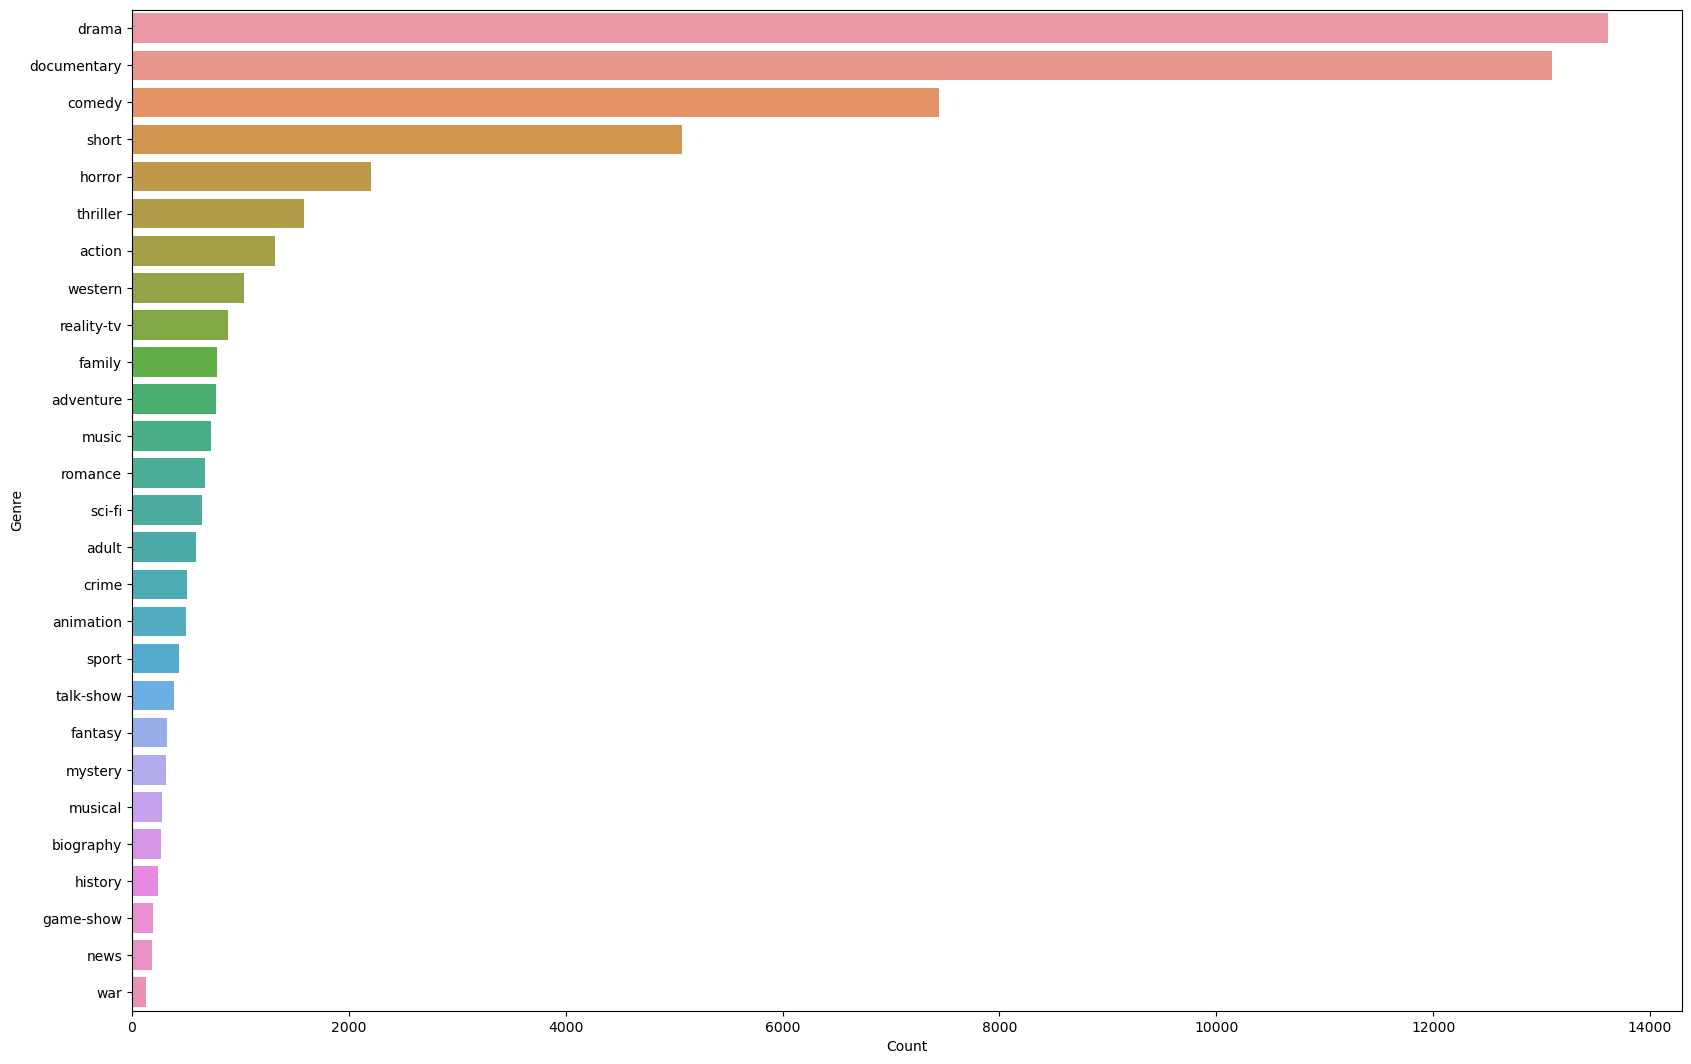

In [18]:
plt.figure(figsize=(20,13))
total = train_data.genre.value_counts()
sns.barplot(x = total, y=total.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Data Preprocessing 

#### Updating the Summary text

In [19]:
def updated_sum(text):
    if isinstance(text, bytes):
        text = text.decode()  
    text = str(text)  
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [20]:
train_data['updated_sum'] = train_data['summary'].apply(updated_sum)

In [21]:
test_data['updated_sum'] = test_data['summary'].apply(updated_sum)

##### stopwords removal

In [23]:
swe = stopwords.words('english')
len(swe)

179

In [24]:
def stopwr(text):
    modified_text = []
    for i in text.split():
        if not i in swe:
            modified_text.append(i)
    return ' '.join(modified_text)

In [25]:
train_data['updated_sum'] = train_data['updated_sum'].apply(stopwr)
train_data.head()

,id,movie,genre,summary,updated_sum
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers un recovered bodies ground ...


In [26]:
test_data['updated_sum'] = test_data['updated_sum'].apply(stopwr)
test_data.head()

,id,movie,summary,updated_sum
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart...",l r brane loves life car apartment job especia...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a marti...,known internationally martial arts superstar b...


### Performing WordCloud

In [27]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

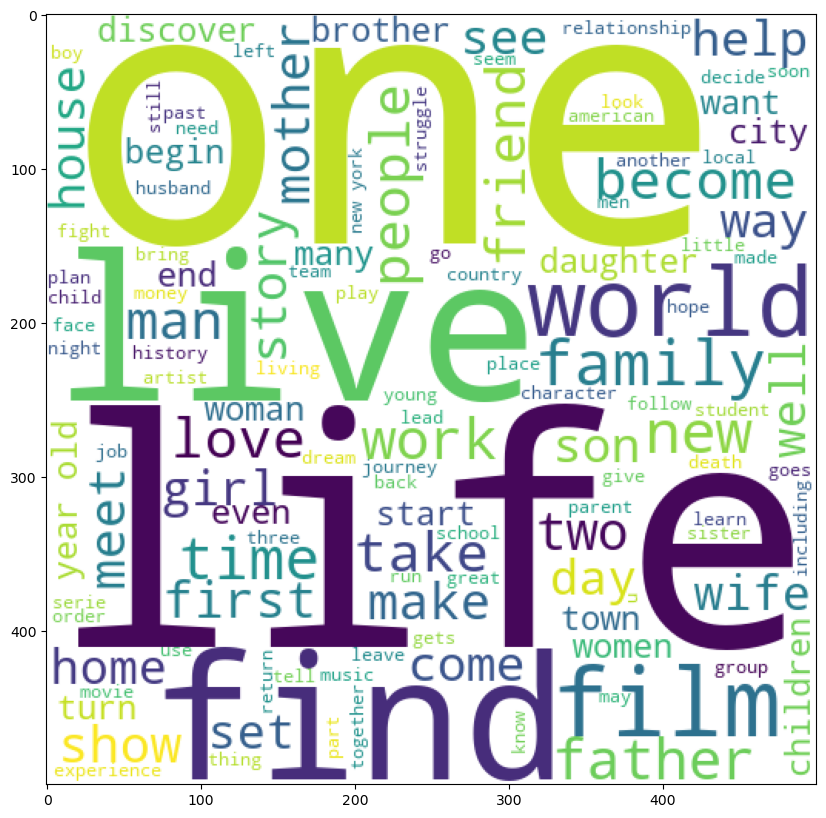

In [28]:
wc_freq = wc.generate(train_data['updated_sum'].str.cat(sep=''))
plt.figure(figsize=(16,10))
plt.imshow(wc_freq)

## Feature Extraction

##### Using TF-IDF Features

In [29]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train = tfidf_vectorizer.fit_transform(train_data['updated_sum'])
X_test = tfidf_vectorizer.transform(test_data['updated_sum'])

In [30]:
X = X_train
y = train_data['genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 9)

#### Finding Accuracy for multiple Models

##### MultinomialNB

In [31]:
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy of MUltionalNB:", accuracy)

Accuracy of MUltionalNB: 0.5148944019182883


##### LogisticRegression 

In [32]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy of LogisticRegression:", accuracy)

Accuracy of LogisticRegression: 0.588951397214793


##### As LogisticRegression is more accurate as compaired to MultinomialNB

In [33]:
test_pred = lr.predict(X_test)

In [34]:
for i in range(5):
    k = np.random.randint(0, X_test.shape[0])
    print("Movie: ", train_data['movie'].iloc[k])
    print("Predicted genre: ", test_pred[k],"\n")

Movie:  180 (2012)
Predicted genre:  comedy 

Movie:  Azusa Street: The Movie (2006)
Predicted genre:  documentary 

Movie:  A Beautiful Tragedy (2008)
Predicted genre:  drama 

Movie:  ""Dialing for Dollars"" (1967)
Predicted genre:  drama 

Movie:  Death by Ninja (2013)
Predicted genre:  drama 

